# 1. 이미지
- 이미지전처리 : 이미지 내의 불필요한 데이터 줄이고 유의미한 데이터 정제하는 과정
- 실제 이미지로 학습이 필요함
- 애니메이션, 일러스트 합성 이미지 제거 필수
- 불필요 정보 제거
- 이미지 내 필요한 정보 강화
- 이미지 크기 및 해상도 조정
- 색상 공간 변환

# 2. 이미지 정제 실습

In [ ]:
# 파일 정렬설치
# pip install natsort 설치

# os listdir
import os

# 이미지가 저장된 디렉토리 경로
img_dir = './image01_data'

# 디렉토리 내 모든 파일 목록 가져오기
file_list_temp = sorted(os.listdir(img_dir))
print(file_list_temp)

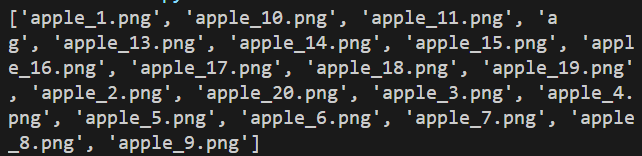

In [ ]:
# 이미지 정렬하기
img_dir = './image01_data'
file_list_temp01 = sorted(os.listdir(img_dir))
print(file_list_temp01)

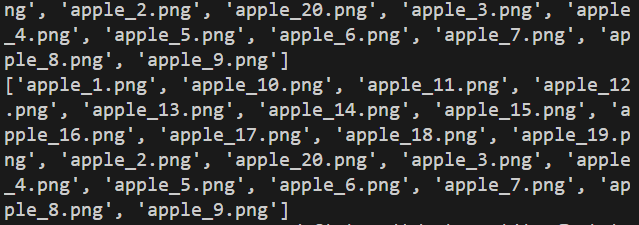

In [ ]:
# 이미지 재정렬
from natsort import natsort
file_list_sort = natsort.natsorted(glob.glob(os.path.join("사과", "*.jpg")))
print(file_list_sort)

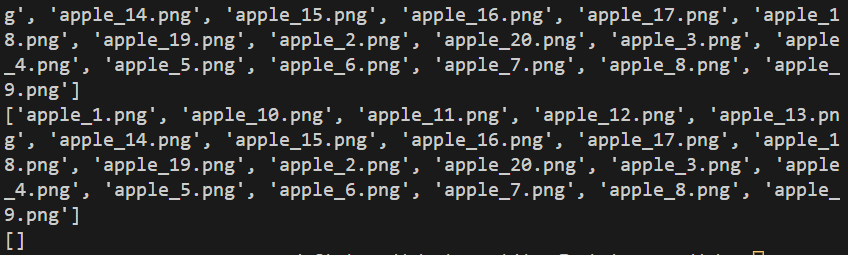

In [ ]:
# os.walk
def get_img_paths(root_path):   #하위에 있는 경로 모두 탐색
    file_paths = []
    for (path, dir, files) in os.walk(root_path):
        print("path", path)
        print("dir", dir)
        print("files", files)
        for file in files :
            file_path = os.path.join(path, file)
            print("file_path : ", file_path)
            ext = os.path.splitext(file)[-1].lower()
            print("ext", ext)
            formats_list = [".bmp", ".jpg", ".jpeg", ".png", ".tif",
                            ".dng", ".tiff"]    #이미지 형식 타입(외우기)
            if ext in formats_list:
                file_path = os.path.join(path, file)
                print("file_path :", file_path)
                file_paths.append(file_path)
        return file_paths

file_paths_temp = get_img_paths("./data/")
print(file_paths_temp)

['apple_1.png', 'apple_10.png', 'apple_11.png', 'apple_12.png', 'apple_13.png', 'apple_14.png', 'apple_15.png', 'apple_16.png', 'apple_17.png', 'apple_18.png', 'apple_19.png', 'apple_2.png', 'apple_20.png', 'apple_3.png', 'apple_4.png', 'apple_5.png', 'apple_6.png', 'apple_7.png', 'apple_8.png', 'apple_9.png']
['apple_1.png', 'apple_10.png', 'apple_11.png', 'apple_12.png', 'apple_13.png', 'apple_14.png', 'apple_15.png', 'apple_16.png', 'apple_17.png', 'apple_18.png', 'apple_19.png', 'apple_2.png', 'apple_20.png', 'apple_3.png', 'apple_4.png', 'apple_5.png', 'apple_6.png', 'apple_7.png', 'apple_8.png', 'apple_9.png']
[]
</br>
path ./data/
</br>
dir []
</br>
files ['image01.jpeg']
</br>
file_path :  ./data/image01.jpeg
</br>
ext .jpeg
</br>
file_path : ./data/image01.jpeg
</br>
['./data/image01.jpeg']

In [ ]:
# 이미지 정방형 만들기
# pip3 install image 설치 후 진행
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def expand2square(pil_img, background_color):
    width, height = pil_img.size

    #정사각형
    if width == height:
        return pil_img

    # 너비가 높이보다 큰 경우 처리하는 코드
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

    def resize_with_padding(pil_img, new_size, background_color):
        img = expend2square(pil_img, background_color)
        img = img.resize((new_size[0], new_size[1], Image.ANTIALIAS))
        return img

img = Image.open("./image01.jpeg")
img_new = resize_with_padding(img, (300, 300), (0,0,255))

plt.imshow(img)
plt.show()

plt.imshow(img_new)
plt.show()

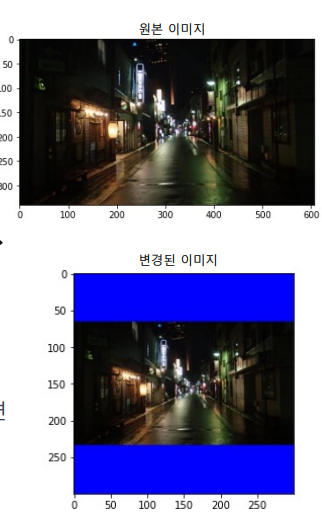